In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/abalone.csv')
df.info()
print(df[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
  Sex  Length  Diameter  ...  Viscera weight  Shell weight  Rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I

In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
with open('/content/drive/MyDrive/abalone.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader:
        rows.append(row)

In [5]:
rows[:5]

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'],
 ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'],
 ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'],
 ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'],
 ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]

In [7]:
input_cnt, output_cnt = 10, 1
data = np.zeros([len(rows), input_cnt + output_cnt])

print(data.shape)

(4177, 11)


In [20]:
for n, row in enumerate(rows):
    if row[0] == 'M' : data[n,0] = 1
    if row[0] == 'F' : data[n,1] = 1
    if row[0] == 'I' : data[n,2] = 1
    data[n,3:] = row[1:]
  
print(data)
print(data.shape[0])

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      1.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      1.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]
4177


In [9]:
train_ratio = 0.8
#훈련데이터 총 개수
test_begin_index = int(data.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3341


In [35]:
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map[:10])

[ 726 1327  714 3209 3386 3375 3318 1554   27 2541]


In [23]:
train_data = data[shuffle_map[:test_begin_index]]
print(train_data.shape)

(3341, 11)


In [12]:
test_data = data[shuffle_map[test_begin_index:]]
print(test_data.shape)

(836, 11)


In [13]:
train_X, train_Y = train_data[:, : -output_cnt], train_data[:, -output_cnt : ]
test_X, test_Y = test_data[:, : -output_cnt], test_data[:, -output_cnt : ]
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(3341, 10)
(3341, 1)
(836, 10)
(836, 1)


In [14]:
train_X_mean = np.mean(train_X, axis = 0)
print(train_X_mean)

[0.36635738 0.30769231 0.32595031 0.52263245 0.40691559 0.1390452
 0.82138072 0.35603233 0.17920832 0.23733628]


In [15]:
train_X_std = train_X.std(axis = 0)
print(train_X_std)

[0.48180873 0.46153846 0.46872882 0.11935183 0.09886484 0.04216618
 0.4865253  0.21956696 0.10919092 0.13903966]


In [36]:
# Z-Score 정규화
train_X -= train_X_mean
train_X /= train_X_std

In [37]:
# Z-Score 정규화
test_X -= train_X_mean
test_X /= train_X_std

In [44]:
GJ_NET_MODEL_V1 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 10,
                                                             activation = 'elu',
                                                             input_shape = (10,)),
                                       tf.keras.layers.Dense(units = 24,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 36,
                                                             activation = 'elu'),
                                       tf.keras.layers.Dense(units = 1)
])

In [45]:
GJ_NET_MODEL_V1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_6 (Dense)              (None, 36)                900       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 37        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________


In [46]:
GJ_NET_MODEL_V1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                        loss = 'mse')

In [47]:
history_1 = GJ_NET_MODEL_V1.fit(train_X, train_Y,
                                epochs = 25,
                                batch_size = 32,
                                validation_split = 0.2)

Epoch 1/25
84/84 [==============================] - 1s 3ms/step - loss: 11.5168 - val_loss: 8.0538
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 6.2861 - val_loss: 6.2048
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 6.1162 - val_loss: 5.0456
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: 5.5322 - val_loss: 6.6562
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 5.5796 - val_loss: 4.8796
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 5.0711 - val_loss: 6.8805
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 5.2939 - val_loss: 4.9823
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: 11.8842 - val_loss: 11.4644
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 11.2781 - val_loss: 10.9356
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: 10.3295 - val_loss: 11.1026
Epoch 11/25


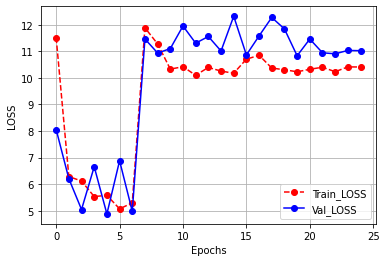

In [48]:
plt.plot(history_1.history['loss'], '--o', color = 'red', label = 'Train_LOSS')
plt.plot(history_1.history['val_loss'], '-o', color = 'blue', label = 'Val_LOSS')

plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.legend()
plt.grid()

plt.show()

In [49]:
GJ_NET_MODEL_V1.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 1ms/step - loss: 12.0233


12.02326488494873

In [50]:
pred_Y = GJ_NET_MODEL_V1.predict(test_X)
print(pred_Y[:10])

[[9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]
 [9.264761]]


In [51]:
test_Y[:10]

array([[12.],
       [ 8.],
       [10.],
       [21.],
       [10.],
       [ 8.],
       [ 9.],
       [ 8.],
       [19.],
       [11.]])

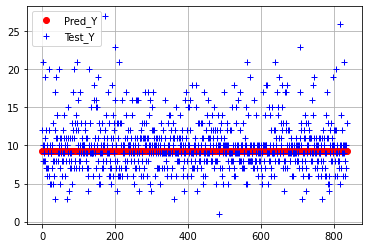

In [52]:
plt.plot(pred_Y[:], 'o', color = 'red', label = "Pred_Y")
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.legend()
plt.grid()

plt.show()

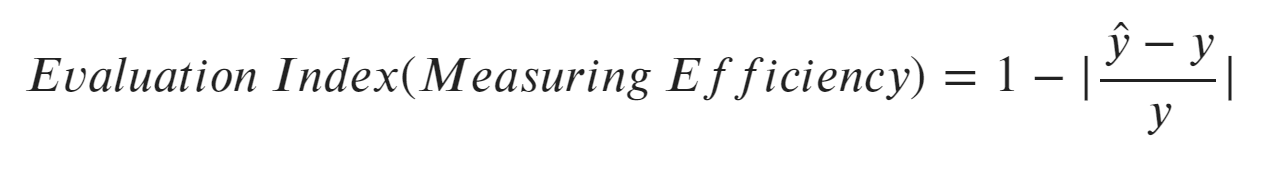

In [53]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V1 - ACC : {} %".format(np.round(acc * 100,3)))

GJ_NET_MODEL_V1 - ACC : 74.244 %


In [54]:
GJ_NET_MODEL_V2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(units = 1,
                                                             input_shape = (10,))
])

In [55]:
GJ_NET_MODEL_V2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [67]:
 GJ_NET_MODEL_V2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.07),
                         loss = 'mse')

In [68]:
history_2 = GJ_NET_MODEL_V2.fit(train_X, train_Y,
                                epochs = 200, batch_size = 32,
                                validation_split = 0.2,
                                callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                              patience = 10)])

Epoch 1/200
84/84 [==============================] - 0s 2ms/step - loss: 6.3288 - val_loss: 4.7494
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 7.0593 - val_loss: 5.0363
Epoch 3/200
84/84 [==============================] - 0s 2ms/step - loss: 5.2852 - val_loss: 10.4380
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 17.9158 - val_loss: 4.5969
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 6.0516 - val_loss: 4.6886
Epoch 6/200
84/84 [==============================] - 0s 1ms/step - loss: 6.1938 - val_loss: 4.6397
Epoch 7/200
84/84 [==============================] - 0s 1ms/step - loss: 5.9757 - val_loss: 4.7097
Epoch 8/200
84/84 [==============================] - 0s 1ms/step - loss: 6.1561 - val_loss: 4.6927
Epoch 9/200
84/84 [==============================] - 0s 2ms/step - loss: 6.1633 - val_loss: 5.0677
Epoch 10/200
84/84 [==============================] - 0s 2ms/step - loss: 6.6861 - val_loss: 4.6197
Epoch 1

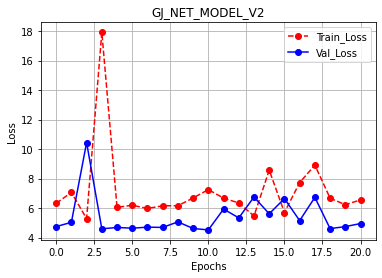

In [69]:
plt.plot(history_2.history['loss'], '--o', color = 'red', label = 'Train_Loss')
plt.plot(history_2.history['val_loss'], '-o', color = 'blue', label = 'Val_Loss')

plt.title("GJ_NET_MODEL_V2")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

In [70]:
pred_Y = GJ_NET_MODEL_V2.predict(test_X)
print(pred_Y[:10])

[[10.249508 ]
 [ 8.792044 ]
 [11.9192295]
 [14.445444 ]
 [ 9.883453 ]
 [ 6.7946186]
 [10.529869 ]
 [10.194643 ]
 [12.683446 ]
 [11.316431 ]]


In [71]:
test_Y[:10]

array([[12.],
       [ 8.],
       [10.],
       [21.],
       [10.],
       [ 8.],
       [ 9.],
       [ 8.],
       [19.],
       [11.]])

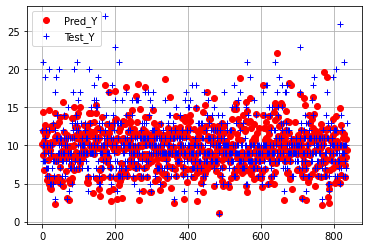

In [72]:
plt.plot(pred_Y[:], 'o', color = 'red', label = 'Pred_Y')
plt.plot(test_Y[:], '+', color = 'blue', label = 'Test_Y')

plt.legend()
plt.grid()

plt.show()

In [73]:
acc = 1 - np.mean(np.abs((pred_Y - test_Y) / test_Y))
print("GJ_NET_MODEL_V2 - ACC : {} %".format(np.round(acc * 100,2)))

GJ_NET_MODEL_V2 - ACC : 83.4 %
